In [12]:
import feedparser
import newspaper

#pip install feedparser
#pip3 install newspaper3k
from konlpy.tag import Kkma
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

feeds = feedparser.parse('https://media.daum.net/syndication/today_sisa.rss') #다음뉴스 rss
#feeds
links = [entry['link'] for entry in feeds['entries']]
#links

from tqdm import tqdm_notebook
news_text=''
for link in tqdm_notebook(links):
    article = newspaper.Article(links[0], language='ko')
    article.download()
    article.parse()
    article.text
    news_text += article.text

#news_text

In [8]:
kkma = Kkma()
nouns = kkma.nouns(news_text)
nouns = [n for n in nouns if len(n) > 1]
nouns

['청주의',
 '주의',
 '국회의원',
 '선거',
 '논공',
 '논공행상',
 '행상',
 '잡음',
 '11',
 '11일',
 '지역',
 '정치권',
 '21',
 '21대',
 '총선',
 '청주',
 '선거구',
 '당선',
 '자신',
 '선거사무소',
 '사무소',
 '검찰',
 '고발',
 '회계',
 '의원',
 '선거과정',
 '과정',
 '다수',
 '부정',
 '주장',
 '직후',
 '의원실',
 '합류',
 '문제',
 '갈등',
 '기사',
 '제목',
 '주요',
 '문장',
 '기반',
 '자동',
 '자동요약',
 '요약',
 '결과',
 '전체',
 '맥락',
 '이해',
 '본문',
 '보기',
 '권장']

In [9]:
count = Counter(nouns)
tags = count.most_common(40)
tags

[('청주의', 1),
 ('주의', 1),
 ('국회의원', 1),
 ('선거', 1),
 ('논공', 1),
 ('논공행상', 1),
 ('행상', 1),
 ('잡음', 1),
 ('11', 1),
 ('11일', 1),
 ('지역', 1),
 ('정치권', 1),
 ('21', 1),
 ('21대', 1),
 ('총선', 1),
 ('청주', 1),
 ('선거구', 1),
 ('당선', 1),
 ('자신', 1),
 ('선거사무소', 1),
 ('사무소', 1),
 ('검찰', 1),
 ('고발', 1),
 ('회계', 1),
 ('의원', 1),
 ('선거과정', 1),
 ('과정', 1),
 ('다수', 1),
 ('부정', 1),
 ('주장', 1),
 ('직후', 1),
 ('의원실', 1),
 ('합류', 1),
 ('문제', 1),
 ('갈등', 1),
 ('기사', 1),
 ('제목', 1),
 ('주요', 1),
 ('문장', 1),
 ('기반', 1)]

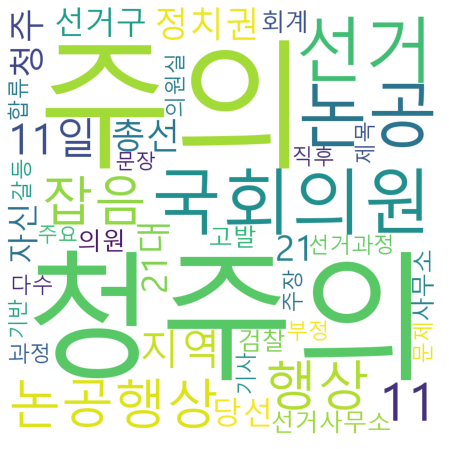

In [13]:
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", 
                background_color='white', width=900, height=900)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()